In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pd.set_option("display.max_columns",100)

In [2]:
# Loading  the dataset
file_path = 'Hotel_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data.head(10)

,hotel,is_canceled,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date,booking_date
0,Resort Hotel,0,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015-07-01,2014-07-24
1,Resort Hotel,0,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015-07-01,2013-06-24
2,Resort Hotel,0,27,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015-07-01,2015-06-24
3,Resort Hotel,0,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015-07-01,2015-06-18
4,Resort Hotel,0,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015-07-01,2015-06-17
5,Resort Hotel,0,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2015-07-01,2015-06-17
6,Resort Hotel,0,27,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2015-07-01,2015-07-01
7,Resort Hotel,0,27,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,2015-07-01,2015-06-22
8,Resort Hotel,1,27,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,2015-07-01,2015-04-07
9,Resort Hotel,1,27,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,2015-07-01,2015-04-17


In [4]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [5]:
data.columns

Index(['hotel', 'is_canceled', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'arrival_date', 'booking_date'],
      dtype='object')

In [6]:
# Display basic statistics of the dataset
print("\nBasic Statistics:")
data.describe()


Basic Statistics:


,is_canceled,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Check for missing values
print("\nMissing Values in Each Column:")
data.isnull().sum()


Missing Values in Each Column:


hotel                                  0
is_canceled                            0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_par

In [8]:
#Adding arrival year and arrival month form further analysis

data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# Extracting year and month from 'arrival_date'
data['arrival_year'] = data['arrival_date'].dt.year
data['arrival_month'] = data['arrival_date'].dt.month_name()

# Display the first few rows to verify
data[['arrival_date', 'arrival_year', 'arrival_month']].head()


,arrival_date,arrival_year,arrival_month
0,2015-07-01,2015,July
1,2015-07-01,2015,July
2,2015-07-01,2015,July
3,2015-07-01,2015,July
4,2015-07-01,2015,July


# Exploratory Data Analysis(EDA)

### Distribution of hotel types


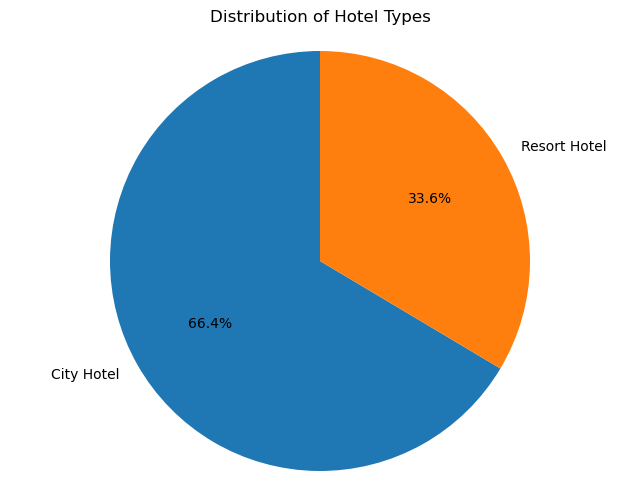

In [9]:
# Calculate the distribution of hotel types
hotel_counts = data['hotel'].value_counts()

# Create a pie chart
#This plot shows the distribution of bookings between different types of hotels (city hotel vs. resort hotel).
plt.figure(figsize=(8, 6))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Hotel Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

The analysis shows that 66.4% of bookings are for City hotels, while 33.6% are for Resort hotels, indicating a customer preference for City-style accommodations. 

### Distribution of Booking Cancellations

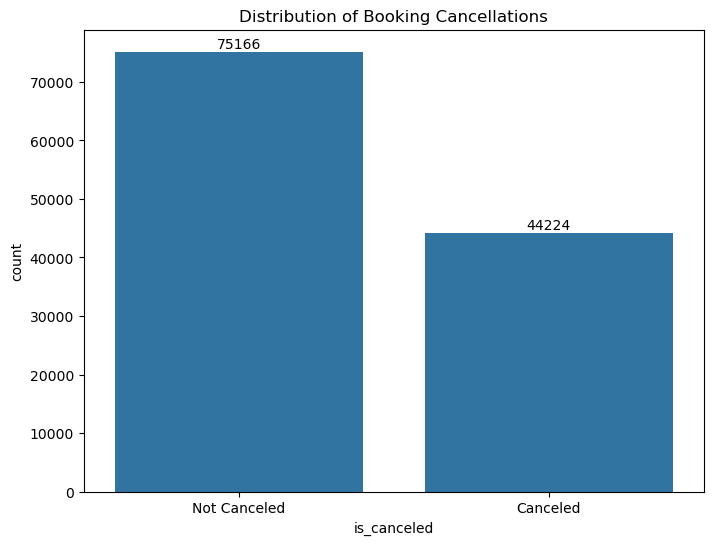

In [10]:
# Check the distribution of the variable ('Is Canceled')
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='is_canceled', data=data)
ax.bar_label(ax.containers[0])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Canceled', 'Canceled'])
plt.title('Distribution of Booking Cancellations')
plt.show()

About **37%** of bookings are canceled, which is a significant proportion, indicating a notable level of uncertainty in customer commitments. Understanding the cancellation patterns could help in implementing measures to reduce them, such as stricter cancellation policies or better customer engagement.

### Market Segment distribution

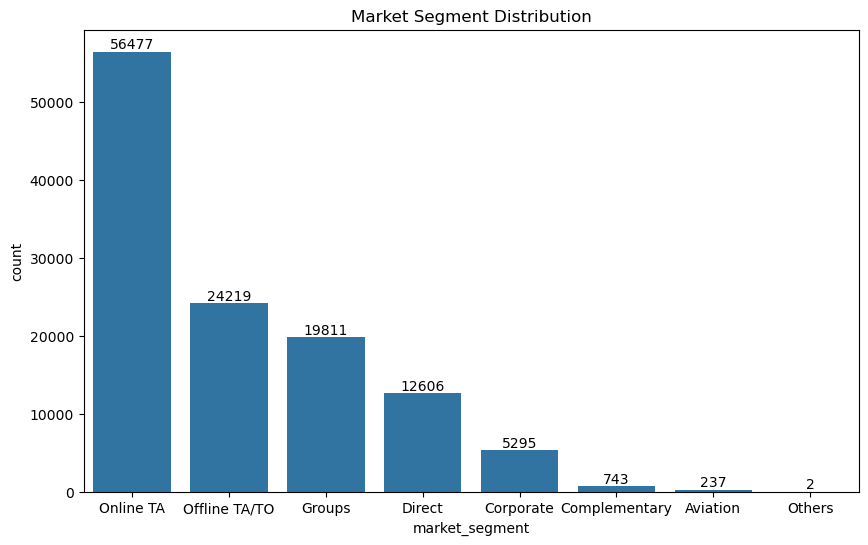

In [11]:
#Provides insights into how customers are booking their stays.

# Replace undefined/(NaN) values in 'market_segment' with 'Others'
data['market_segment'] = data['market_segment'].replace('Undefined', 'Others').fillna('Others')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='market_segment', data=data, order=data['market_segment'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Market Segment Distribution')
plt.show()

The majority of bookings are made through Online Travel Agencies (47%), followed by Offline TA/TO (20%) and Groups (17%), indicating the significant role of third-party platforms in customer acquisition. The distribution also reflects customer booking behavior, with a notable portion of customers preferring online and group bookings.

### Lead Time Distribution- Difference in days between 'arrival _date' and 'booking_date'

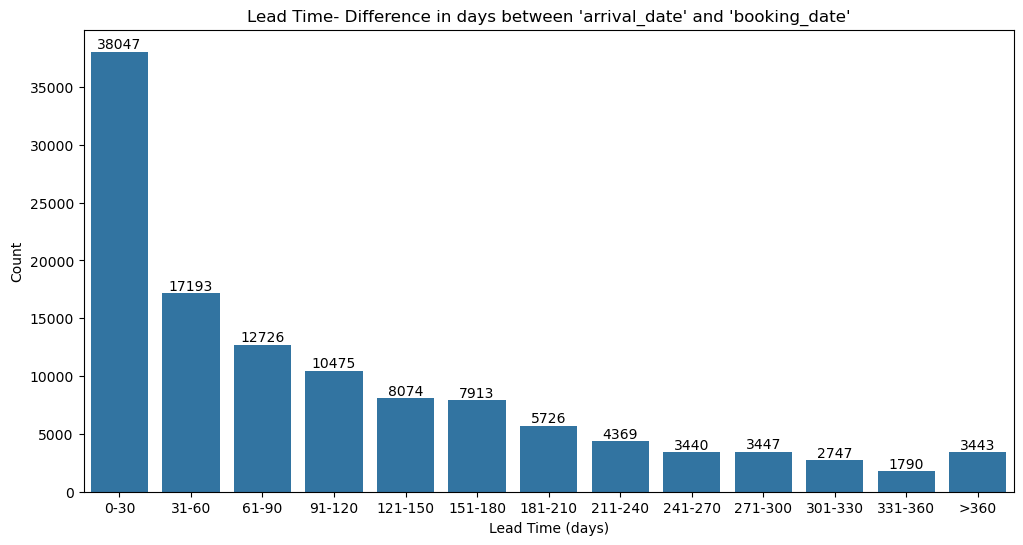

In [12]:
# Convert the columns to datetime
data['booking_date'] = pd.to_datetime(data['booking_date'])
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# Calculate 'lead_time' as the difference in days between 'arrival_date' and 'booking_date'
data['lead_time'] = (data['arrival_date'] - data['booking_date']).dt.days

# Create bins for lead_time
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, data['lead_time'].max()+1]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '>360']
data['lead_time_bin'] = pd.cut(data['lead_time'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='lead_time_bin', data=data, order=labels)
ax.bar_label(ax.containers[0])
plt.title("Lead Time- Difference in days between 'arrival_date' and 'booking_date'")
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()

The lead time distribution plot categorizes the number of bookings into various bins based on the number of days between the booking date and the arrival date. This analysis provides insights into customer booking behavior, showing that most bookings occur with shorter lead times (0-30 days). As the lead time increases, the number of bookings tends to decrease. This pattern suggests that customers generally prefer to book closer to their arrival dates, possibly to avoid unforeseen changes. This understanding can inform marketing strategies, such as offering last-minute deals or promotions to fill rooms closer to the booking date.

### Distribution of each deposit type

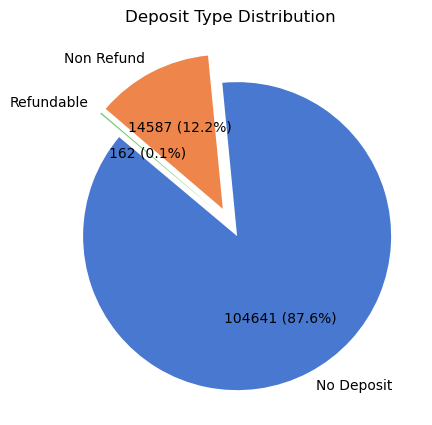

In [13]:
# Calculate Distribution of each deposit type
deposit_counts = data['deposit_type'].value_counts()

# Define the explode parameter to make one slice stand out
explode = [0.1] * len(deposit_counts)
explode[0] = 0.1

# Function to format the labels to show actual numbers and percentages
def format_func(pct, total):
    count = int(round(pct * total / 100))
    return f'{count} ({pct:.1f}%)'

plt.figure(figsize=(6, 5))

# Create a pie chart with counts and percentages as labels
plt.pie(
    deposit_counts,
    labels=deposit_counts.index,
    autopct=lambda pct: format_func(pct, sum(deposit_counts)),
    startangle=140,
    explode=explode,
    colors=sns.color_palette('muted')
)

plt.title('Deposit Type Distribution')
plt.show()

The deposit type distribution plot shows the proportion of bookings made under different deposit conditions (No Deposit, Non-Refundable, and Refundable). The majority of bookings are made with no deposit, reflecting customer preference for flexibility. Non-refundable deposits, while less common, still represent a significant portion, especially in scenarios where customers are confident in their travel plans. Refundable deposits are the least common, indicating that customers either prefer the flexibility of no deposits or are willing to commit fully with non-refundable deposits. Understanding these preferences helps hotels tailor their deposit policies to maximize booking confirmations while still accommodating customers' need for flexibility.

# Feature Relationships: 

### Cancellation rate by hotel type

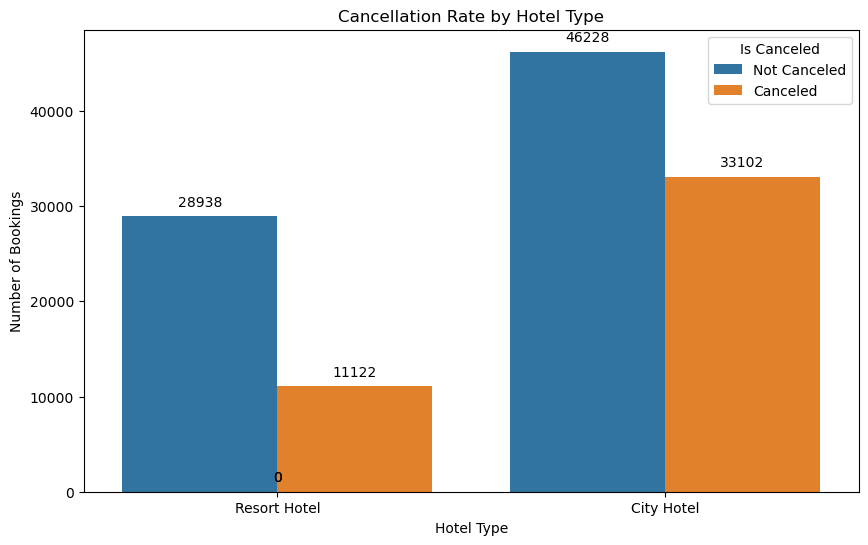

In [14]:
# Plotting the cancellation rate by hotel type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hotel', hue='is_canceled', data=data)

# Add counts on top of the bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Cancellation Rate by Hotel Type')
plt.ylabel('Number of Bookings')
plt.xlabel('Hotel Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


The cancellation analysis by hotel type reveals that city hotels experience a higher cancellation rate compared to resort hotels. This suggests that bookings at city hotels, which might cater more to business or short-term travelers, are more prone to changes or cancellations. On the other hand, resort hotels, which are often booked for leisure or vacation purposes, have lower cancellation rates, indicating more committed or planned stays.

### Cancellation rate for each lead time

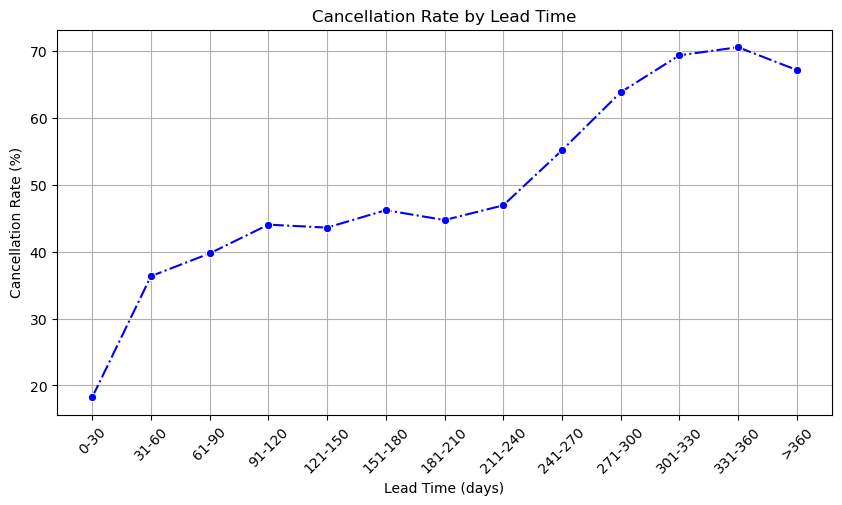

In [15]:
# Calculate cancellation rate for each lead_time_bin
cancel_rate = data.groupby('lead_time_bin', observed=False).agg(
    total=('is_canceled', 'size'),
    canceled=('is_canceled', 'sum')
)
cancel_rate['cancellation_rate'] = cancel_rate['canceled'] / cancel_rate['total'] * 100
cancel_rate = cancel_rate.reset_index()

# Plotting
plt.figure(figsize=(10, 5))

# Create a line plot for cancellation rates
sns.lineplot(
    x='lead_time_bin',
    y='cancellation_rate',
    data=cancel_rate,
    marker='o',
    linestyle='dashdot',
    color='blue'  # Line color
)

plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


The analysis reveals that as lead time increases, so does the cancellation rate. This trend suggests that customers booking far in advance may have a higher tendency to change plans, leading to cancellations. Understanding this behavior can help in designing flexible pricing and cancellation policies to reduce cancellations.

### Deposit Type Distribution and Cancellation Rate for different hotel types

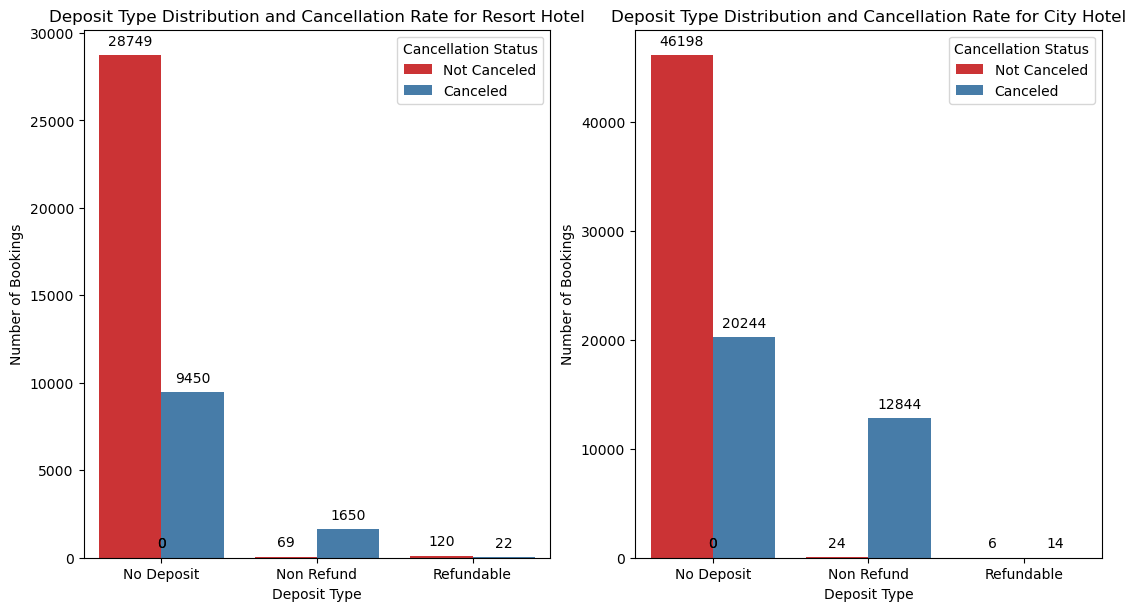

Count        Percentage           
                                             0 (%)      1 (%)
Hotel Type   deposit_type                                    
Resort Hotel No Deposit    28749   9450  75.261132  24.738868
             Non Refund       69   1650   4.013962  95.986038
             Refundable      120     22  84.507042  15.492958
City Hotel   No Deposit    46198  20244  69.531321  30.468679
             Non Refund       24  12844   0.186509  99.813491
             Refundable        6     14  30.000000  70.000000

In [16]:
# Get unique hotel types
hotel_types = data['hotel'].unique()


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 6), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, hotel_type in enumerate(hotel_types):
    # Filter data for the current hotel type
    hotel_data = data[data['hotel'] == hotel_type]
    
    # Count plot for deposit type with hue for cancellation status
    sns.countplot(x='deposit_type', hue='is_canceled', data=hotel_data, palette='Set1', 
                  order=data['deposit_type'].value_counts().index, ax=axes[i])
    
    # Add counts on top of the bars
    ax = axes[i]
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Set titles and labels
    ax.set_title(f'Deposit Type Distribution and Cancellation Rate for {hotel_type}')
    ax.set_ylabel('Number of Bookings')
    ax.set_xlabel('Deposit Type')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Not Canceled', 'Canceled'], title='Cancellation Status')


plt.show()


# Create an empty DataFrame to store results
results = pd.DataFrame()


for hotel_type in hotel_types:
    # Filter data for the current hotel type
    hotel_data = data[data['hotel'] == hotel_type]
    
    # Calculate total counts for each deposit type
    deposit_totals = hotel_data['deposit_type'].value_counts()
    
    # Calculate counts and percentages
    counts = hotel_data.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)
    percentages = counts.div(deposit_totals, axis=0) * 100
    
    # Flatten the multi-index and combine counts and percentages into a single DataFrame
    counts_and_percentages = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Add hotel_type as a column for clarity
    counts_and_percentages['Hotel Type'] = hotel_type
    
    # Append to results DataFrame
    results = pd.concat([results, counts_and_percentages.reset_index()])

# Reformat the DataFrame for better display
results = results.set_index(['Hotel Type', 'deposit_type'])
results.columns = pd.MultiIndex.from_tuples([(col[0], f'{col[1]} (%)') if col[0] == 'Percentage' else (col[0], '') for col in results.columns])

results

The analysis indicates that for both resort and city hotels, most bookings are made with a no-deposit option, while refundable deposit options see fewer bookings. The findings show that non-refundable bookings, especially in city hotels, have a higher cancellation rate despite their payment commitment. This suggests that customers might still cancel even when facing a financial penalty, potentially due to changes in plans or preferences. The distribution also provides insights into customer preferences and risk tolerance, which can inform pricing strategies.

### Number of Reservations and Cancellations per Month for Each Hotel

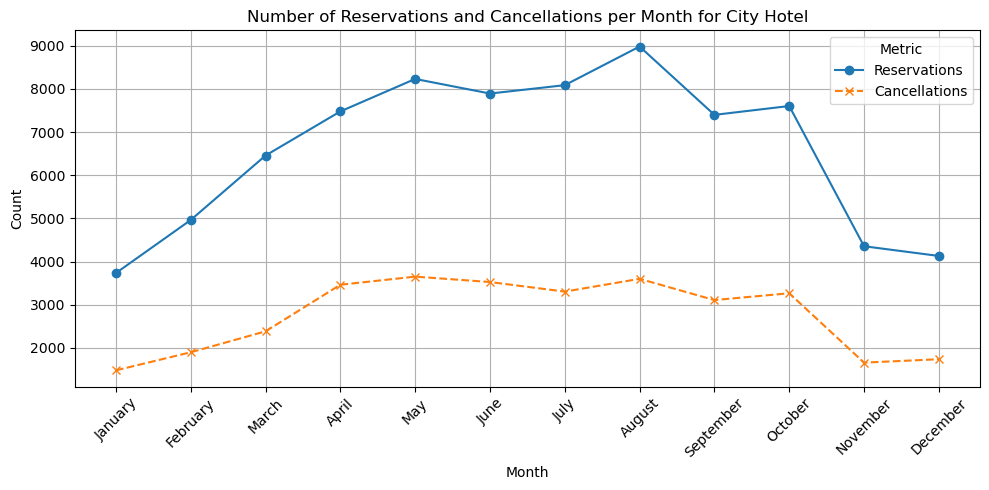

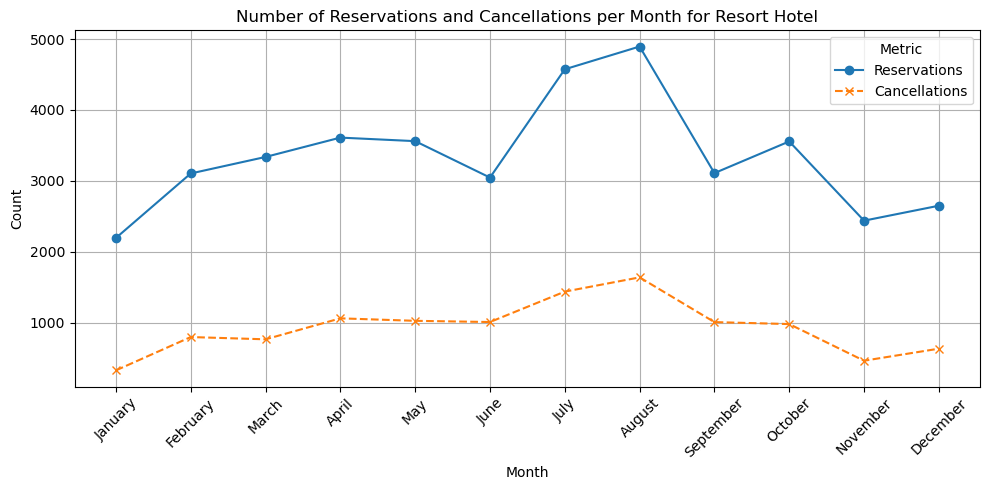

In [17]:
# Calculate the number of reservations per month for each hotel type
reservations_per_month_and_type = data.groupby(['arrival_month', 'hotel'], observed=False).size().unstack()

# Calculate the number of cancellations per month for each hotel type
cancellations_per_month_and_type = data.groupby(['arrival_month', 'hotel'], observed=False)['is_canceled'].sum().unstack()

# Reindex months to ensure they appear in correct order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

reservations_per_month_and_type = reservations_per_month_and_type.reindex(months_order)
cancellations_per_month_and_type = cancellations_per_month_and_type.reindex(months_order)

# List of hotel types
hotel_types = reservations_per_month_and_type.columns

# Plotting
for hotel_type in hotel_types:
    # Filter data for the current hotel type
    reservations_data = reservations_per_month_and_type[hotel_type]
    cancellations_data = cancellations_per_month_and_type[hotel_type]

    plt.figure(figsize=(10, 5))

    # Plot reservations
    plt.plot(reservations_data.index, reservations_data, marker='o', label='Reservations')

    # Plot cancellations
    plt.plot(cancellations_data.index, cancellations_data, marker='x', linestyle='--', label='Cancellations')

    plt.title(f'Number of Reservations and Cancellations per Month for {hotel_type}')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='Metric')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

The analysis shows that both city and resort hotels experience a seasonal trend in reservations and cancellations, with peaks typically in the summer months (July and August). City hotels have higher reservations and cancellations throughout the year, indicating a more volatile booking environment compared to resort hotels. This seasonal fluctuation suggests that both hotel types need to prepare for increased demand and potential cancellations during peak travel seasons.

### Booking Cancellation Status for each month with ADR

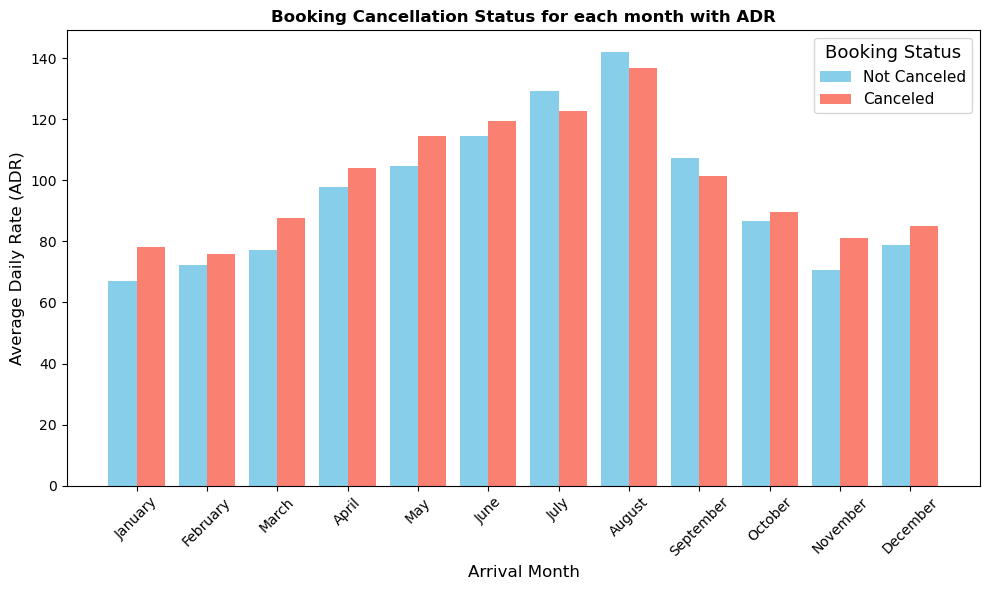

In [18]:
# Ensure 'arrival_month' is categorical and ordered correctly
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_month'] = pd.Categorical(data['arrival_month'], categories=ordered_months, ordered=True)

# Ensure ADR is a float
data['adr'] = data['adr'].astype(float)

# Create separate columns for ADR based on cancellation status
data_pivot = data.pivot_table(index=['arrival_month'], columns='is_canceled', values='adr', 
                              aggfunc='mean', observed=False).fillna(0)

# Reset index for plotting
data_pivot = data_pivot.reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting with separate bars for each cancellation status
bar_width = 0.4  # Width of the bars
index = range(len(data_pivot))

# Create bars for non-cancelled bookings
plt.bar(index, data_pivot[0], bar_width, label='Not Canceled', color='skyblue')

# Create bars for canceled bookings
plt.bar([i + bar_width for i in index], data_pivot[1], bar_width, label='Canceled', color='salmon')

plt.title('Booking Cancellation Status for each month with ADR', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks([i + bar_width / 2 for i in index], data_pivot['arrival_month'], rotation=45)
plt.legend(title='Booking Status', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


The analysis reveals that the Average Daily Rate (ADR) varies across months and is generally higher during peak seasons like summer(July and August). Bookings that are not canceled tend to have a slightly lower ADR compared to those that are canceled, particularly in high-demand months. This pattern suggests that customers may be more likely to cancel bookings with higher ADRs, possibly due to cost concerns or changes in plans. Hotels could use this insight to adjust pricing strategies during peak periods to minimize revenue loss.

### ADR Ranges vs Booking Cancellation Status

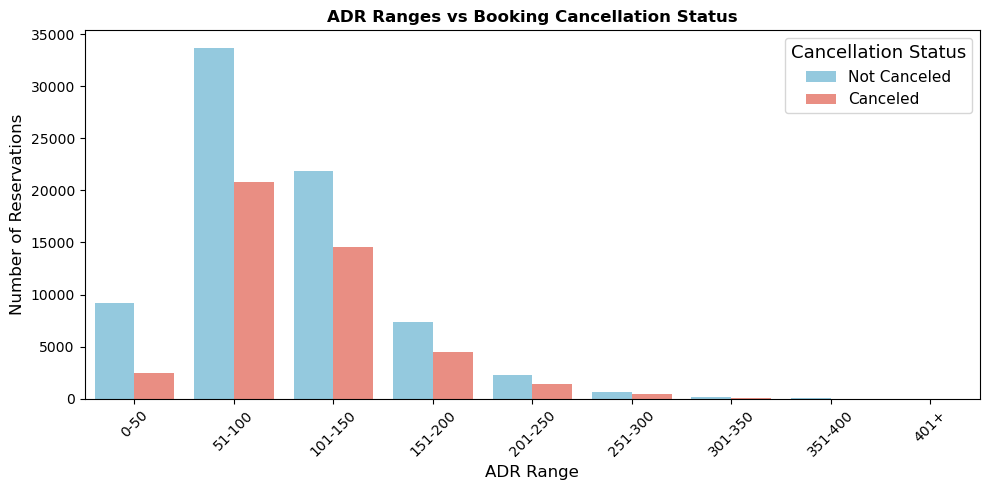

In [19]:
# Ensure 'adr' is a float
data['adr'] = data['adr'].astype(float)

# Create ADR ranges (bins)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401+']
data['adr_range'] = pd.cut(data['adr'], bins=bins, labels=labels, right=False)

# Ensure 'is_canceled' is categorical
data['is_canceled'] = data['is_canceled'].astype('category')

# Plotting
plt.figure(figsize=(10, 5))

# Count plot for ADR ranges vs Cancellation status
sns.countplot(x='adr_range', hue='is_canceled', data=data, palette={0: 'skyblue', 1: 'salmon'})


plt.title('ADR Ranges vs Booking Cancellation Status', weight='bold')
plt.xlabel('ADR Range', fontsize=12)
plt.ylabel('Number of Reservations', fontsize=12)
plt.legend(title='Cancellation Status', title_fontsize='13', fontsize='11', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Above analysis of ADR ranges shows that cancellations are more frequent in the middle ADR ranges (51-150), which could represent a broad segment of customers with varying budgets. Bookings with very low or very high ADRs exhibit fewer cancellations, possibly due to either lower financial commitment or higher perceived value. This insight highlights the importance of understanding the pricing sweet spot where cancellations are most likely, enabling hotels to tailor their pricing and cancellation policies accordingly. It also suggests that premium pricing could be associated with more committed customers.

### Cancellation Rate by Preference for Weekend vs Week Nights

In [20]:
# Ensure 'is_canceled' is categorical and 'adr' is float
data['is_canceled'] = data['is_canceled'].astype('int')  # Convert to integer for aggregation
data['adr'] = data['adr'].astype(float)

# Create categories based on stays_in_weekend_nights and stays_in_week_nights
data['prefers_weekend'] = data['stays_in_weekend_nights'] > data['stays_in_week_nights']

# Calculate cancellation rates based on preference
cancellation_summary = data.groupby('prefers_weekend').agg({
    'is_canceled': 'mean',  # Mean cancellation rate
    'stays_in_weekend_nights': 'mean',
    'stays_in_week_nights': 'mean',
    'adr': 'mean'  # Optionally include average ADR for additional context
}).reset_index()

# Rename columns for clarity
cancellation_summary.rename(columns={
    'is_canceled': 'cancellation_rate',
    'stays_in_weekend_nights': 'avg_weekend_nights',
    'stays_in_week_nights': 'avg_week_nights',
    'adr': 'avg_adr'
}, inplace=True)

cancellation_summary

,prefers_weekend,cancellation_rate,avg_weekend_nights,avg_week_nights,avg_adr
0,False,0.374163,0.834433,2.756408,102.075533
1,True,0.340934,1.660625,0.485256,99.908092


The table above shows that bookings with a preference for weekend stays have a slightly lower cancellation rate (34%) compared to those preferring weekday stays (37%). Additionally, weekend stays are associated with slightly lower ADRs compared to weekdays, which could influence the lower cancellation rates. Hotels can use this information to implement different cancellation policies for weekday versus weekend reservations to maximize retention.

### Cancellation Rate by Number of Special Requests

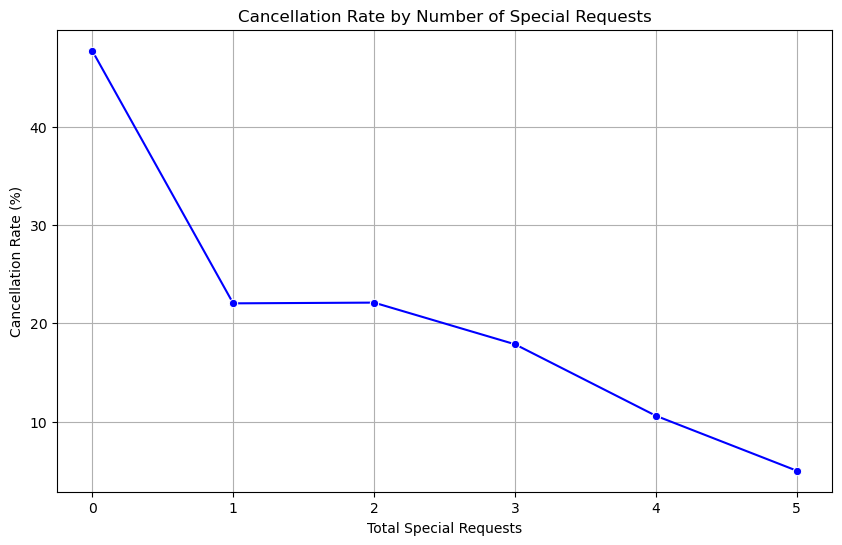

In [21]:
# Calculate the total bookings and canceled bookings for each number of special requests
special_requests_data = data.groupby('total_of_special_requests').agg(
    total_bookings=('is_canceled', 'size'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

# Calculate the cancellation rate as a percentage
special_requests_data['cancellation_rate'] = (special_requests_data['canceled_bookings'] / special_requests_data['total_bookings']) * 100

# Plotting the cancellation rate line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='total_of_special_requests', y='cancellation_rate', data=special_requests_data, marker='o', linestyle='-', color='b')

plt.title('Cancellation Rate by Number of Special Requests')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Total Special Requests')
plt.grid(True)
plt.show()

Bookings with more special requests have a lower cancellation rate, implying that customers making these requests are more committed to their stays. This could be due to the personalized service or the effort invested in planning their stay. The insight suggests that encouraging customers to make special requests might reduce cancellation rates. These findings can inform customer service strategies and help in identifying high-value customers.

### Cancellation rate by market segment

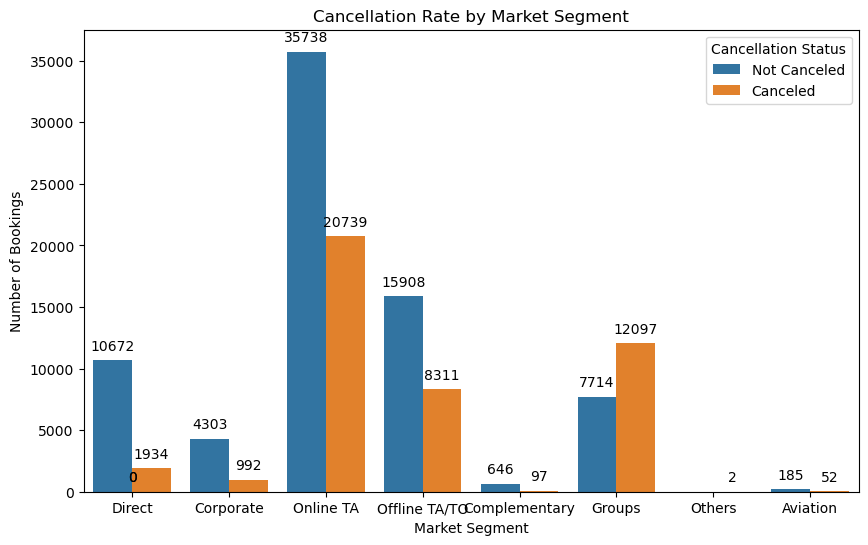

In [22]:
# Plotting the cancellation rate by market segment

# Function to add counts on top of the bars
def countplot_with_counts(x, hue=None, **kwargs):
    ax = sns.countplot(x=x, hue=hue, **kwargs)
    # Iterate through each bar in the countplot
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.figure(figsize=(10, 6))
countplot_with_counts(x='market_segment', hue='is_canceled', data=data)

plt.title('Cancellation Rate by Market Segment')
plt.ylabel('Number of Bookings')
plt.xlabel('Market Segment')
# plt.legend(title='Is Canceled')
plt.legend(['Not Canceled', 'Canceled'], title='Cancellation Status')
plt.show()

The analysis shows that Online TA bookings have the highest cancellation rates, while direct and corporate bookings exhibit lower rates, indicating more reliable customer segments. This suggests that efforts to increase direct bookings or target corporate clients might reduce overall cancellation rates. The unique high cancellation rate for group bookings could be due to the complexity of organizing for larger numbers.

### Cancellation rate per room type

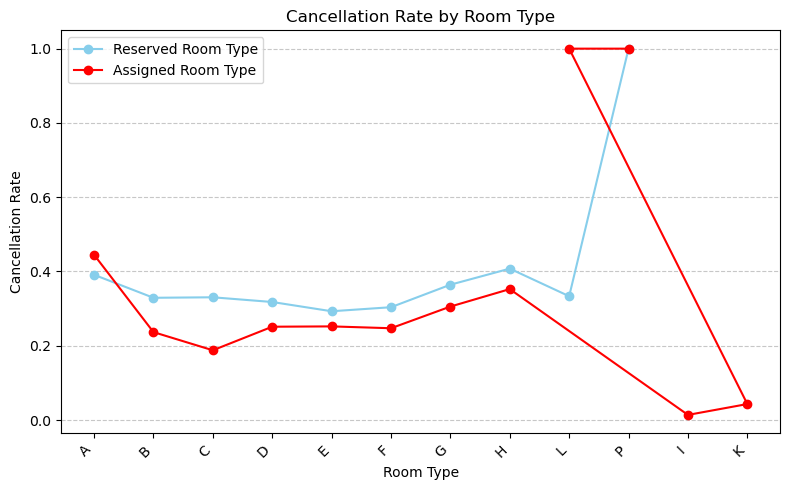

In [23]:
# Group by 'reserved_room_type'/'assigned_room_type' and calculate the mean of 'is_canceled'
cancellation_by_room_reserved_type = data.groupby('reserved_room_type')['is_canceled'].mean()
cancellation_by_room_assigned_type = data.groupby('assigned_room_type')['is_canceled'].mean()


plt.figure(figsize=(8, 5))


# Plotting the cancellation rate by reserved room type
plt.plot(cancellation_by_room_reserved_type.index, cancellation_by_room_reserved_type.values, 
         marker='o', linestyle='-', color='skyblue', label='Reserved Room Type')

# Plotting the cancellation rate by assigned room type
plt.plot(cancellation_by_room_assigned_type.index, cancellation_by_room_assigned_type.values, 
         marker='o', linestyle='-', color='red', label='Assigned Room Type')

# Adding titles and labels
plt.title('Cancellation Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

The analysis of room types shows that the cancellation rate varies between different reserved and assigned room types. Customers are less likely to cancel if they receive the room they originally reserved. This suggests that ensuring room preference alignment could be a key factor in reducing cancellations.

### Effect of Room mismatch on cancellations and total bookings

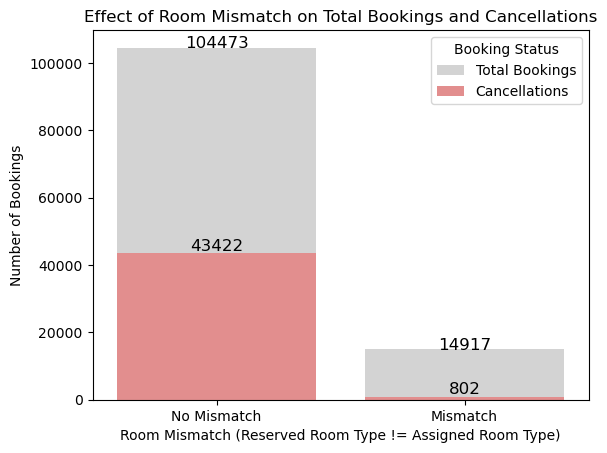

   room_mismatch  Not Canceled  Canceled  Total Bookings
0          False         61051     43422          104473
1           True         14115       802           14917


In [24]:
# Plotting the effect of room mismatch on cancellations and total bookings

# Create a new column to indicate if the reserved room is different from the allotted room
data['room_mismatch'] = data['reserved_room_type'] != data['assigned_room_type']

# Calculate the number of bookings and cancellations by room mismatch
room_mismatch_counts = data.groupby('room_mismatch')['is_canceled'].value_counts().unstack().reset_index()
room_mismatch_counts.columns = ['room_mismatch', 'Not Canceled', 'Canceled']

# Calculate the total number of bookings for each room mismatch status
room_mismatch_counts['Total Bookings'] = room_mismatch_counts['Not Canceled'] + room_mismatch_counts['Canceled']

# plt.figure(figsize=(12, 6))

# Create a bar plot for mismatched vs matched room bookings and cancellations
sns.barplot(x='room_mismatch', y='Total Bookings', data=room_mismatch_counts, color='lightgrey', label='Total Bookings')
sns.barplot(x='room_mismatch', y='Canceled', data=room_mismatch_counts, color='lightcoral', label='Cancellations')

# Adding counts on top of the bars
for index, row in room_mismatch_counts.iterrows():
    plt.text(index, row['Total Bookings'], f'{int(row["Total Bookings"])}', color='black', ha="center", fontsize=12)
    plt.text(index, row['Canceled'], f'{int(row["Canceled"])}', color='black', ha="center", va='bottom', fontsize=12)

plt.title('Effect of Room Mismatch on Total Bookings and Cancellations')
plt.xlabel('Room Mismatch (Reserved Room Type != Assigned Room Type)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['No Mismatch', 'Mismatch'])  # Set x-axis labels
plt.legend(title='Booking Status', loc='upper right')
plt.show()

# Displaying the dataframe for reference
print(room_mismatch_counts)

The analysis indicates that when there is no mismatch between the reserved and allotted room types, the cancellation rate is relatively high, around 45-50%. However, when there is a mismatch, the cancellation rate drops significantly to below 10%. This counterintuitive result suggests that customers might be willing to accept a different room if it meets their needs, or they might cancel if their expectations are too high.

### Effect of customer type on cancellations

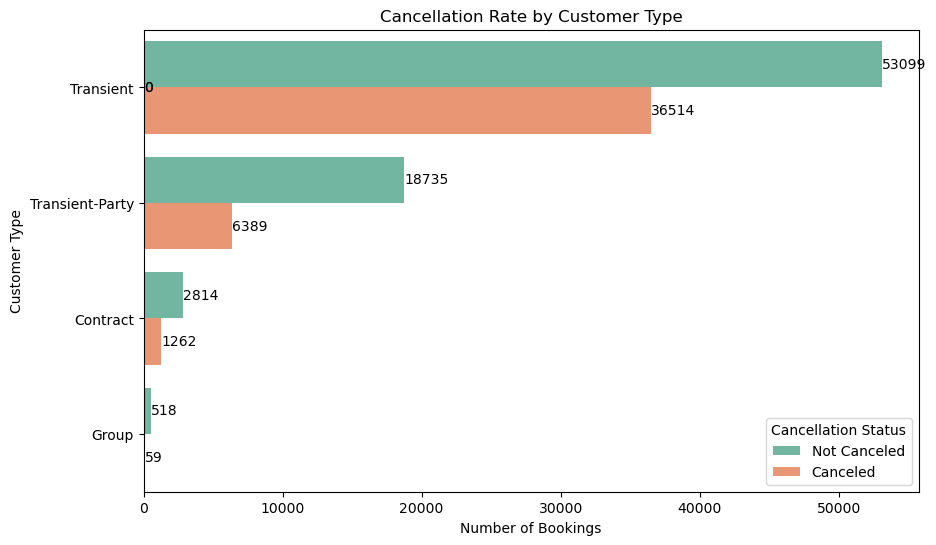

In [25]:
# Prepare the data
customer_type_cancellation_counts = data.groupby('customer_type')['is_canceled'].value_counts().unstack().fillna(0).reset_index()
customer_type_cancellation_counts.columns = ['customer_type', 'Not Canceled', 'Canceled']

# Convert the data to long format for plotting
melted_data = customer_type_cancellation_counts.melt(id_vars='customer_type', value_vars=['Not Canceled', 'Canceled'],
                                                     var_name='Cancellation Status', value_name='Count')

# Determine the order based on total bookings (sum of 'Not Canceled' and 'Canceled')
customer_type_cancellation_counts['Total Bookings'] = customer_type_cancellation_counts[['Not Canceled', 'Canceled']].sum(axis=1)
sorted_order = customer_type_cancellation_counts.sort_values(by='Total Bookings', ascending=False)['customer_type']

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='customer_type', x='Count', hue='Cancellation Status', data=melted_data, palette='Set2', order=sorted_order)

# Adding counts within the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10, color='black')

# Adding titles and labels
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Number of Bookings')
plt.ylabel('Customer Type')
plt.legend(title='Cancellation Status', loc='lower right')
plt.show()

Transient bookings, which are typically made by individuals or small parties, have the highest cancellation rates, while group bookings have the lowest. This suggests that transient customers are less committed, possibly due to personal or unpredictable reasons. Contract and group bookings, on the other hand, are more stable and reliable. By analyzing the above plot, we can identify which customer types are more or less prone to cancellations, helping in better understanding customer behavior.

### Correlation Matrix of Selected Features

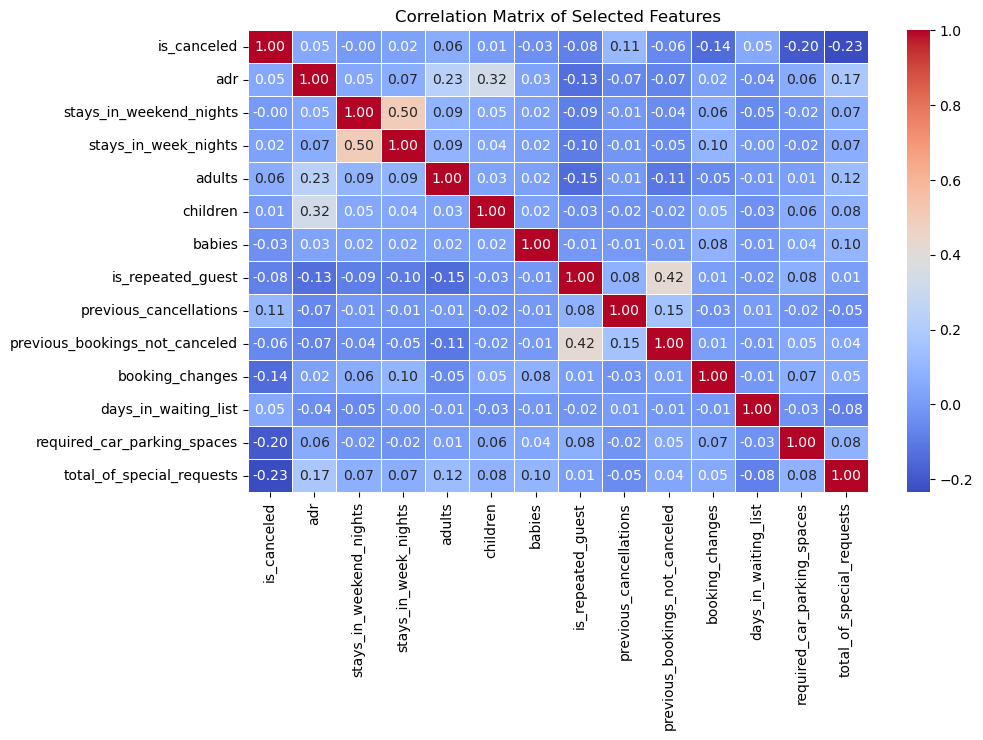

In [26]:

# Considering below selected features
features = ['is_canceled','adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
            'babies','is_repeated_guest', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes', 
            'days_in_waiting_list', 'required_car_parking_spaces', 
            'total_of_special_requests']

# Compute the correlation matrix
corr_matrix = data[features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


The correlation matrix shows that features like the number of special requests, previous cancellations, and repeated guests have strong correlations with booking cancellations. This suggests that customers with more special requests or those who have canceled before are more likely to cancel again. Understanding these correlations can help in building predictive models to identify high-risk bookings.

# Model Implementation

In [27]:
# Define the list of features
features_to_encode = ['hotel', 'stays_in_weekend_nights', 'stays_in_week_nights',
                      'adults', 'children', 'babies', 'meal', 'country', 
                      'market_segment', 'distribution_channel', 'is_repeated_guest', 
                      'previous_cancellations', 'previous_bookings_not_canceled', 
                      'reserved_room_type', 'assigned_room_type', 'booking_changes', 
                      'deposit_type', 'agent', 'company', 'days_in_waiting_list', 
                      'customer_type', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests', 'room_mismatch', 'lead_time_bin','arrival_year',
                       'arrival_month']

# Feature matrix X (excluding target variable is_canceled and unnecessary columns)
X = data[features_to_encode].copy()  # Use .copy() to avoid setting-with-copy warnings

# Target variable y
y = data['is_canceled']

# Initialize LabelEncoders and apply them
label_encoders = {}
for feature in features_to_encode:
        label_encoders[feature] = LabelEncoder()
        X[feature] = label_encoders[feature].fit_transform(X[feature].astype(str))
    # No need to encode numerical features

# Standardize numerical features
numerical_features = [feature for feature in features_to_encode if X[feature].dtype in ['int64', 'float64']]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Output the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (83573, 28)
Test features shape: (35817, 28)
Training target shape: (83573,)
Test target shape: (35817,)



Random Forest Model Performance:

Accuracy: 0.8902755674679621

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     22478
           1       0.88      0.82      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.88      0.88     35817
weighted avg       0.89      0.89      0.89     35817



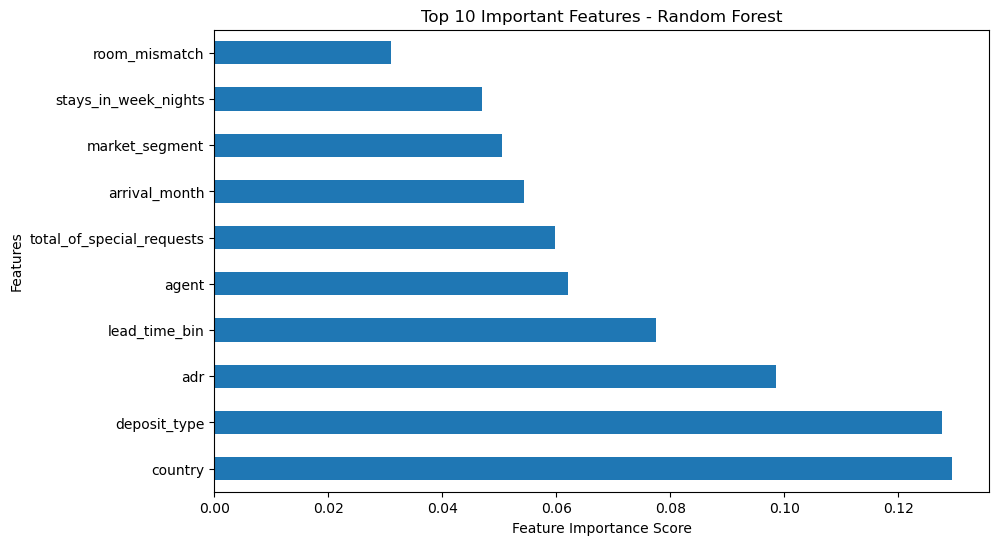

In [29]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Making predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Model
print("\nRandom Forest Model Performance:")
print("\nAccuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))


importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


### Logistic Regression

In [30]:
# Model 2: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Logistic Regression Model
print("\nLogistic Regression Model Performance:")
print("\nAccuracy:", accuracy_score(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions))



Logistic Regression Model Performance:

Accuracy: 0.7888153670044951

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84     22478
           1       0.80      0.58      0.67     13339

    accuracy                           0.79     35817
   macro avg       0.79      0.75      0.76     35817
weighted avg       0.79      0.79      0.78     35817



In [31]:
# Compare Random Forest and Logistic Regression Models
print("Model Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)*100 :.2f}% ")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions)*100 :.2f}% ")


Model Comparison:
Random Forest Accuracy: 89.03% 
Logistic Regression Accuracy: 78.88% 


In [32]:
# Take a random sample from the test set
random_row = X_test.sample(n=1)  

# Predict using the Random Forest model
sample_prediction = rf_model.predict(random_row)

# Take a true label value(is_cancelled) of sample from the original dataset

random_index = random_row.index[0]  
original_row = data.loc[random_index]  
sample_true_label = original_row['is_canceled']

# Output the prediction and the true label
print("Sample True Label:", sample_true_label)
print("Sample Prediction:", sample_prediction[0])

if sample_prediction[0] == sample_true_label:
    print("The prediction is correct.")
else:
    print("The prediction is incorrect.")

Sample True Label: 0
Sample Prediction: 0
The prediction is correct.


The Random Forest model achieved an accuracy of almost 90%, outperforming the Logistic Regression model, which had an accuracy of almost 78%. This indicates that Random Forest is better suited for predicting hotel cancellations in this dataset, likely due to its ability to capture complex relationships between features. The comparison highlights the importance of model selection in achieving high prediction accuracy. Additionally, feature importance analysis from the Random Forest model provides valuable insights into which factors are most influential in predicting cancellations. This understanding can further refine predictive analytics efforts.